In [1]:
import pandas as pd
import re

## Rosie

In [2]:
# extracts only the digits in the filename, which represents the year
def extract_year(file):
    match = re.search(r'yob(\d{4})\.txt', file)
    return int(match.group(1)) if match else None

In [3]:
# creates a main df
rosie_df = pd.DataFrame(columns=['Name', 'Gender', 'Number', 'Year'])

# reads the csv, creates header columns, adds a column for the year, and merges results to `rosie_df`
def get_rosie(file):
    global rosie_df
    df = pd.read_csv(file, header = None)
    df.columns = ['Name', 'Gender', 'Number']
    year = extract_year(file)
    df['Year'] = year
    rosie = df[df['Name'] == 'Rosie']
    rosie_df = pd.concat([rosie_df, rosie], ignore_index=True)

In [4]:
# defining ranges for years covered
start_year = 1997
end_year = 2023  

# looping so I don't have to manually input every year
for year in range(start_year, end_year + 1):
    filename = f'names/yob{year}.txt'
    get_rosie(filename)

In [5]:
# checkpoint
rosie_df

,Name,Gender,Number,Year
0,Rosie,F,150,1997
1,Rosie,F,150,1998
2,Rosie,F,108,1999
3,Rosie,F,101,2000
4,Rosie,F,109,2001
5,Rosie,F,125,2002
6,Rosie,F,110,2003
7,Rosie,F,106,2004
8,Rosie,F,116,2005
9,Rosie,F,125,2006


In [6]:
# save to new csv file
rosie_df.to_csv('rosie-totals.csv')

<Axes: xlabel='Year'>

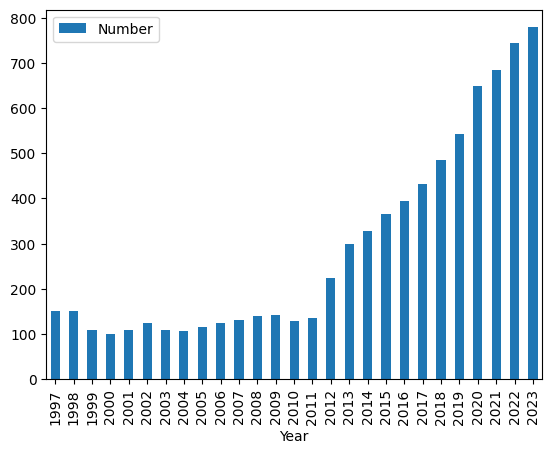

In [7]:
# creating charts to look at trend
import matplotlib.pyplot as plt

rosie_df.plot(x = 'Year', y = 'Number', kind = 'bar')